In [2]:
import numpy as np
import pandas as pd 
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D



import tensorflow as tf
import keras
import os 
import time
#import cv2
import numpy as np
#import matplotlib.pyplot as plt
from keras import optimizers
import keras
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.models import Sequential
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
#import matplotlib.pyplot as plt
#from tqdm import tqdm
from keras.utils import np_utils
#from imgaug import augmenters as iaa    
import itertools
%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
#from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
#from classification_models.keras import Classifiers
# GPU test
from tensorflow.python.client import device_lib
np.random.seed(42)
from keras.models import load_model
# Print version
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import os, sys
import scipy.misc
from glob import glob
import numpy as np
import random 
import shutil 
import keras
import time
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.applications.densenet import DenseNet121
from keras.models import load_model
#from keras.optimizers import Adam
from keras import optimizers
import pickle
import sys
import cv2
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import  EarlyStopping

import tensorflow as tf


np.random.seed(1)

In [3]:
import os
print(os.listdir("../input/face94/Final_dataset"))

['test', 'train']


In [4]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
train_generator=train_datagen.flow_from_directory('../input/face94/Final_dataset/train', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 27340 images belonging to 152 classes.


In [5]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator=test_datagen.flow_from_directory('../input/face94/Final_dataset/test',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 9120 images belonging to 152 classes.


In [6]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3)) 
output=base_model.output
DL1=GlobalAveragePooling2D()(output)
DL2=Dense(1024,activation='relu')(DL1) 
DL3=Dense(1024,activation='relu')(DL2) 
FC=Dense(512,activation='relu')(output) 
preds=Dense(152,activation='softmax')(DL1) 

58892288/58889256 [==============================] - 0s 0us/step


In [7]:
model=Model(inputs=base_model.input,outputs=preds)
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [8]:
Adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
es = EarlyStopping(patience=5)
#Adam

In [9]:
model.compile(optimizer=Adam,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

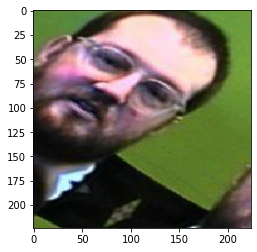

(1, 224, 224, 3)


In [10]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_test=test_generator.n//test_generator.batch_size

img_path='../input/face94/Final_dataset/train/0/9326871.14_0_9816.jpg'
img = image.load_img(img_path,target_size=(224,224))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [11]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,validation_data=test_generator,validation_steps=step_size_test,callbacks=[es],epochs=10)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
854/854 [==============================] - 176s 195ms/step - loss: 5.0283 - accuracy: 0.0268 - val_loss: 4.7145 - val_accuracy: 0.2340
Epoch 2/10
854/854 [==============================] - 88s 103ms/step - loss: 4.6381 - accuracy: 0.3102 - val_loss: 4.4137 - val_accuracy: 0.5878
Epoch 3/10
854/854 [==============================] - 87s 102ms/step - loss: 4.3365 - accuracy: 0.6202 - val_loss: 4.1336 - val_accuracy: 0.7535
Epoch 4/10
854/854 [==============================] - 88s 103ms/step - loss: 4.0597 - accuracy: 0.7821 - val_loss: 3.8725 - val_accuracy: 0.8414
Epoch 5/10
854/854 [==============================] - 87s 101ms/step - loss: 3.7965 - accuracy: 0.8589 - val_loss: 3.6294 - val_accuracy: 0.8867
Epoch 6/10
854/854 [==============================] - 88s 103ms/step - loss: 3.5567 - accuracy: 0.9048 - val_loss: 3.4036 - val_accuracy: 0.9130
Epoch 7/10
854/854 [==============================] - 89s 104ms/step - loss: 3.3312 - accuracy: 0.9197 - val_loss: 3.1924 - val_a

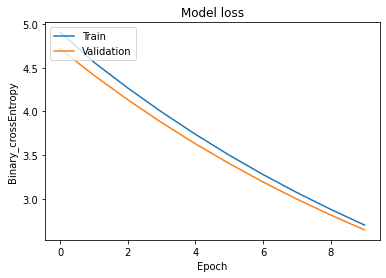

In [13]:
plt.plot(history.history['loss'])                                                                                                                                        
plt.plot(history.history['val_loss'])                                                                                                                                                                                                                                                     
plt.title('Model loss')                                                                                   
plt.ylabel('Binary_crossEntropy')                                                                                                                 
plt.xlabel('Epoch')                                                                      
plt.legend(['Train', 'Validation'], loc='upper left')          
plt.show()  

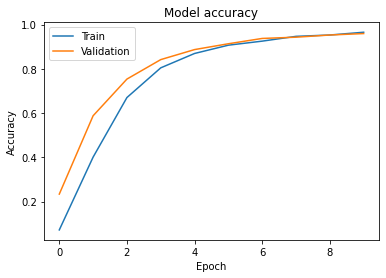

In [14]:
plt.plot(history.history['accuracy'])                                            
plt.plot(history.history['val_accuracy'])         
plt.title('Model accuracy')                           
plt.ylabel('Accuracy')                         
plt.xlabel('Epoch')                      
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))        
print('Highest training accuracy: ', max(history.history['accuracy']))
print('Highest validation accuracy: ', max(history.history['val_accuracy']))

Lowest training loss:  2.699904203414917
Lowest validation loss:  2.644282579421997
Highest training accuracy:  0.9650285840034485
Highest validation accuracy:  0.9591009020805359


In [12]:
#val accuracy
score  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


285/285 [==============================] - 22s 76ms/step - loss: 2.6443 - accuracy: 0.9591
Test loss: 2.6442818641662598
Test accuracy: 0.9591009020805359
